# Identifying patterns and Trends in campus placements data using machine learning

Importing the libraries

The application of machine learning has grown in popularity in today's fast-paced society as technology has permeated every aspect of our lives. Placement prediction is one of the numerous uses of machine learning. Using machine learning algorithms, placement prediction determines the likelihood that a student will be hired by a firm based on a variety of criteria, including academic achievement, skill set, and prior job experience.

Age: The age of the Candidate.

Gender: The gender of the candidate,either male or female.

Stream : The Stream of the candidate i.e; The candidate belongs to which stream like Electronics And Communication,Computer Science,Information Technology,Mechanical,Civil

Internships:The no.of internships done by the candidate.

CGPA : CGPA of the Candidate till 6th semester.

Hostel : Whether Candidate Lives In College Accommodation or not

HistoryOfBacklogs : Whether Student Ever Had Any Backlogs In Any Subjects.

PlacedOrNot : Whether the candidate is Placed or Not.(1--> placed,0-->Not placed) (target variable)

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
 
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
  
import pickle  

In [199]:
df = pd.read_csv('collegePlace.csv')# uploading the dataset

In [200]:
df.shape   # size of the dataset

(2966, 8)

In [201]:
df.head() # first 5 rows of the dataset

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [202]:
df.describe()  # statistical values of the dataset

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [203]:
df.info() # information about the dataset like Columns,Non-Null Count , datatype .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [204]:
df.isnull().sum() # checking the null values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [205]:
df.columns # columns present in the dataset

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [206]:
df = df.drop(columns=['Age', 'Hostel']) # droping the age and hostel columns 

In [207]:
df['Stream'].unique() # identifying the unique values in the Stream column

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

# EDA{Exploratory Data Analysis}

Univariate Analysis

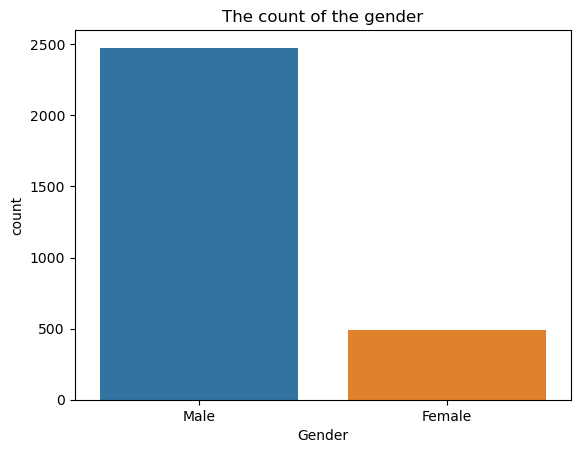

In [208]:
# Perform Univariate Analysis for Gender
sns.countplot(x=df['Gender'],data=df)
plt.title("The count of the gender")
plt.show()


The male students are high when compared to the female students

<Axes: ylabel='Gender'>

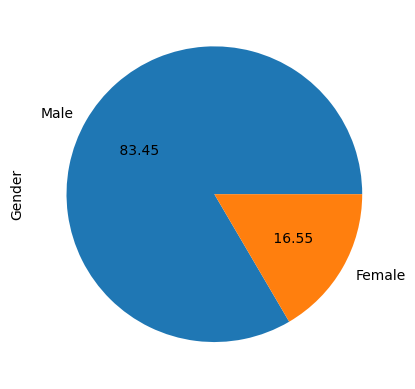

In [209]:
df['Gender'].value_counts().plot(kind='pie',autopct='% .2f')

<Axes: xlabel='Stream', ylabel='count'>

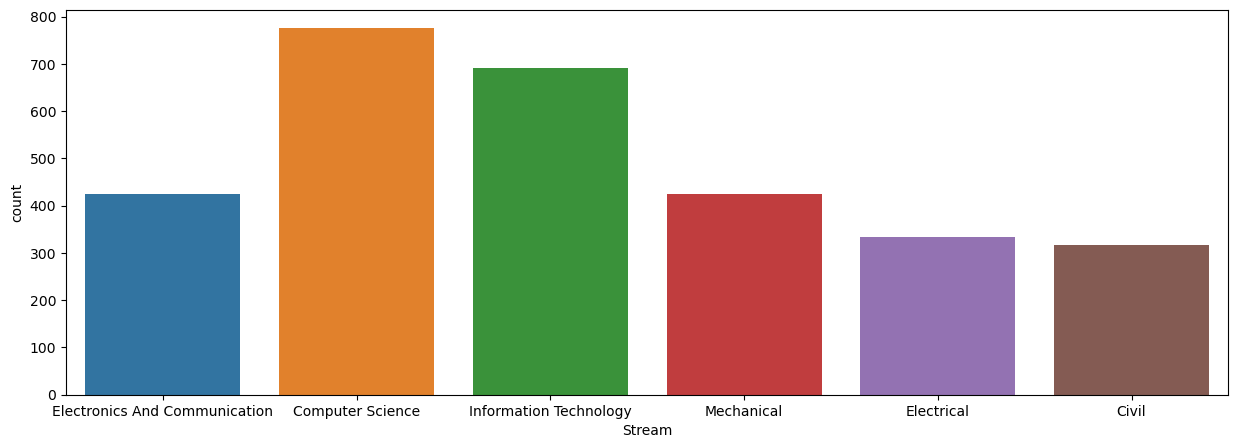

In [210]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Stream'],data=df)
#df['Stream'].value_counts().plot(kind='pie',autopct='% .2f')

  Most of the students are present in the Computer Science and Information Technology and very less students are present in the civil,Electrical.

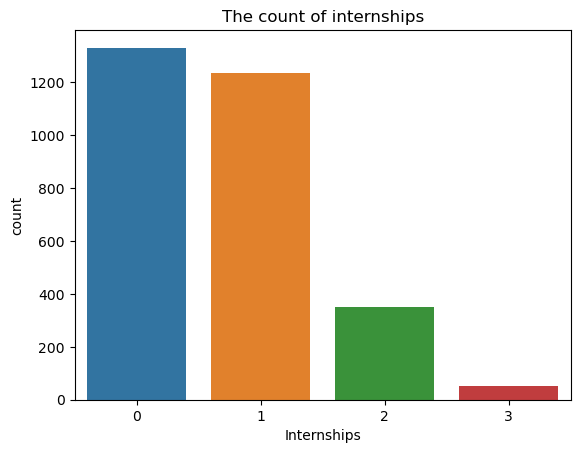

In [211]:
# Perform Univariate Analysis for Internships
sns.countplot(x=df['Internships'],data=df)
plt.title('The count of internships')
plt.show()

Most of the students are done 0 and 1 internship

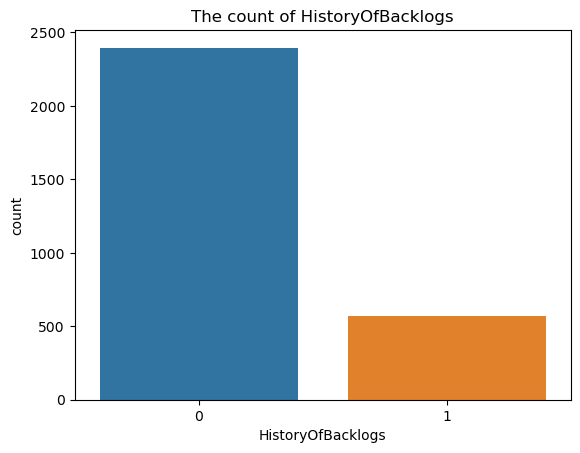

In [212]:


# performing Univariant analysis for HistoryOfBacklogs
sns.countplot(x=df['HistoryOfBacklogs'],data=df)
plt.title('The count of HistoryOfBacklogs')
plt.show()

Most of the students does not contains any Backlogs.

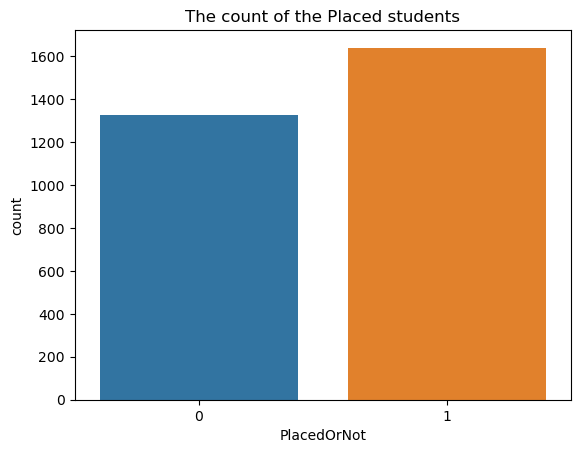

In [213]:
# Performing Univariant analysis for PlacedOrNot
sns.countplot(x=df['PlacedOrNot'],data=df)
plt.title('The count of the Placed students')
plt.show()

 Most of the students are placed.

Bivariant Analysis

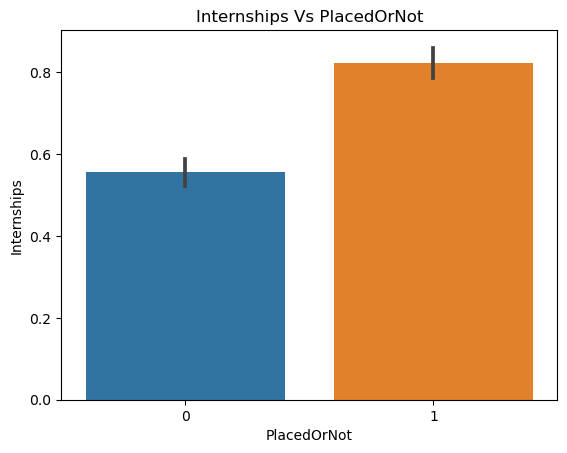

In [214]:

#Bivariant Analysis : Internships vs PlacedORNot
sns.barplot(x=df['PlacedOrNot'],y=df['Internships'],data=df)
plt.title('Internships Vs PlacedOrNot')
plt.show()
     

Magority of students who done internship will be placed.

# Encoding Technique

In [215]:
from sklearn import preprocessing # importing preprocessing for categorical encoding 

In [216]:
le = preprocessing.LabelEncoder() # removing categorical values using LabelEncoding
df['Gender'] = le.fit_transform(df['Gender'])
df['Stream'] = le.fit_transform(df['Stream'])

In [217]:
df.head() # printing the 5 rows after categorical encoding.

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1


In [218]:
df.describe() # discription of the dataset after encoding.

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.834457,2.562374,0.703641,7.073837,0.192178,0.552596
std,0.371732,1.653853,0.740197,0.967748,0.394079,0.497310
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,4.000000,1.000000,8.000000,0.000000,1.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [219]:
df['Stream'].unique() # indentifing unique values in the Stream column after encoding.

array([3, 1, 4, 5, 2, 0])

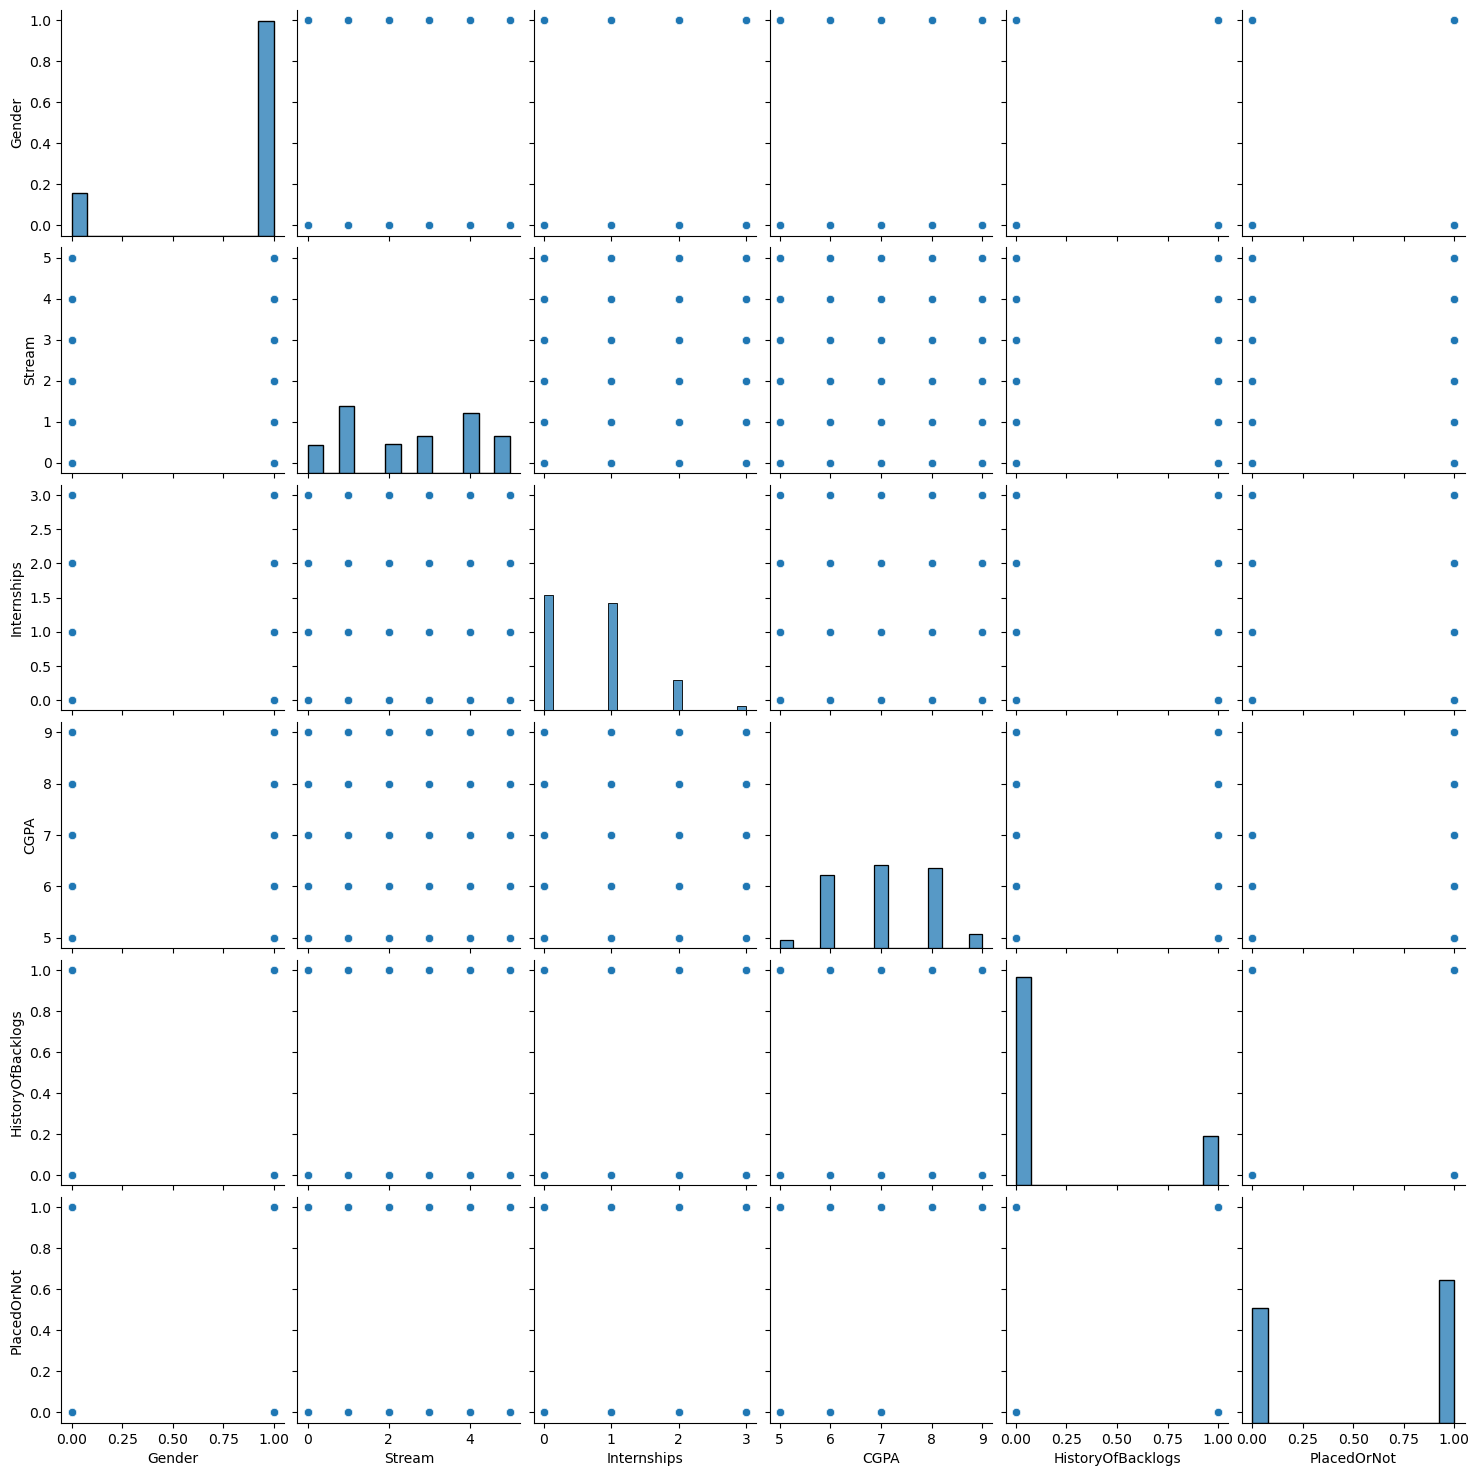

In [220]:
sns.pairplot(df) # Mulitivariant analysis of the dataset

<Axes: >

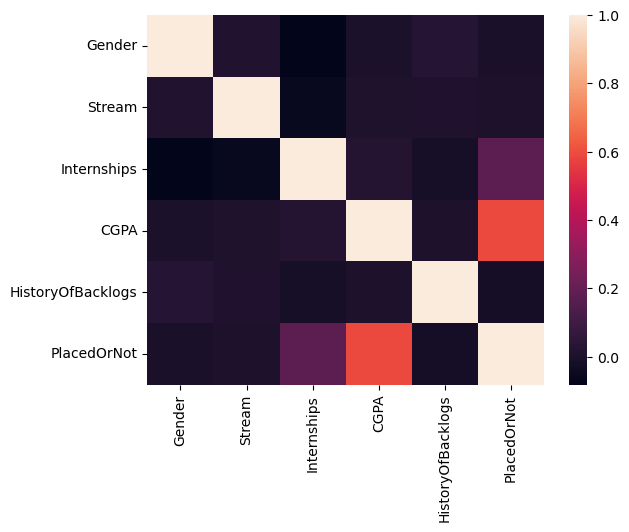

In [221]:
tc = df.corr()
sns.heatmap(tc) # checking the correlation between the columns by using heatmap.

Splitting the dataset

In [222]:
x = df.drop(columns=['PlacedOrNot']) # spliting the feature variables into x.
x

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,1,3,1,8,1
1,0,1,0,7,1
2,0,4,1,6,0
3,1,4,0,8,1
4,1,5,0,8,0
...,...,...,...,...,...
2961,1,4,0,7,0
2962,1,5,1,7,0
2963,1,4,1,7,0
2964,1,1,1,7,0


In [223]:
y = df['PlacedOrNot']  # splitting the target variable into y 
y 

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

Splitting the data into train test split

In [224]:
# spliting the data into training data ,testing data  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [225]:
x_train # x_train

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
2881,1,1,0,6,0
1070,1,3,2,6,0
2556,1,1,1,8,0
1132,0,2,1,9,0
412,1,2,0,7,1
...,...,...,...,...,...
2304,1,0,0,7,0
968,1,5,0,8,0
1667,1,3,0,7,0
1688,0,3,0,6,0


In [226]:
x_test  # x_test

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
1696,1,1,0,6,0
1752,1,5,0,6,1
2370,1,1,1,8,0
2270,1,5,1,6,1
87,1,1,0,6,0
...,...,...,...,...,...
62,1,4,0,8,0
765,1,3,1,8,0
898,0,4,2,7,0
2774,1,1,0,6,0


In [227]:
y_train  # y_train

2881    1
1070    1
2556    1
1132    1
412     0
       ..
2304    0
968     1
1667    0
1688    1
1898    1
Name: PlacedOrNot, Length: 2372, dtype: int64

In [228]:
y_test  # y_test

1696    0
1752    0
2370    1
2270    0
87      0
       ..
62      1
765     1
898     1
2774    0
1125    1
Name: PlacedOrNot, Length: 594, dtype: int64

Scaling the values

In [229]:
scaler = StandardScaler()   # scaling the dataset 
x_train_scale = scaler.fit_transform(x_train)  
x_test_scale = scaler.transform(x_test)  

#Model Building

Logistic regression

In [230]:
# applying the logistic regression.
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
lr = LogisticRegression() 
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [231]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[207  57]
 [ 67 263]]
accuracy score 0.7912457912457912
precision score  0.821875
recall score  0.796969696969697
f1 score  0.8092307692307692


Decision Tree Classifier

In [232]:
# applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [233]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for decision tree model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)


confusion matrix [[260   4]
 [ 72 258]]
accuracy score 0.8720538720538721
precision score  0.9847328244274809
recall score  0.7818181818181819
f1 score  0.8716216216216216


Random Forest


In [234]:
# applying random forest model
from sklearn.ensemble import RandomForestClassifier  
  
rdf = RandomForestClassifier()
rdf = rdf.fit(x_train,y_train)
y_pred = rdf.predict(x_test)
y_pred 


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [235]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for radom forest model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[260   4]
 [ 69 261]]
accuracy score 0.877104377104377
precision score  0.9849056603773585
recall score  0.7909090909090909
f1 score  0.8773109243697478


SVM

In [236]:
# applying svm model { support vector machine}
from sklearn.svm import SVC  
  
svm = SVC()  
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred 


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [237]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for svm model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[258   6]
 [ 77 253]]
accuracy score 0.8602693602693603
precision score  0.9768339768339769
recall score  0.7666666666666667
f1 score  0.8590831918505942


Naive Bayes

In [238]:
# applying Naive Bayes model
from sklearn.naive_bayes import GaussianNB  
nvb = GaussianNB()  

nvb = nvb.fit(x_train,y_train)
y_pred = nvb.predict(x_test)
y_pred 
  



array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [239]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for navie bayes model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[228  36]
 [ 66 264]]
accuracy score 0.8282828282828283
precision score  0.88
recall score  0.8
f1 score  0.8380952380952381


KNN

In [240]:
# applying KNN model to the dataset.
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=3) 
knn = knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred  

  


array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [241]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for KNN model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[231  33]
 [ 61 269]]
accuracy score 0.8417508417508418
precision score  0.890728476821192
recall score  0.8151515151515152
f1 score  0.8512658227848101


Comparision between the models

In [242]:
# comparision between all the models to find the best model with best accuracy.
models = [
    ('Logistic Regression', LogisticRegression()),
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier())
]
results = []

# Train and evaluate models
for name, model in models:
    if 'scale' in dir(model):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
# Compare and print results
results.sort(key=lambda x: x[1], reverse=True)
for name, accuracy in results:
    print(f"{name}: Accuracy = {accuracy:.4f}")
     

Random Forest: Accuracy = 0.8754
Decision Tree: Accuracy = 0.8704
Support Vector Machine: Accuracy = 0.8603
k-Nearest Neighbors: Accuracy = 0.8418
Naive Bayes: Accuracy = 0.8283
Logistic Regression: Accuracy = 0.7912


Testing the model

In [243]:
pred = rdf.predict([[1,1,1,0,0]]) # testing the model with some values.
pred

c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [244]:
df # dataset 

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1
...,...,...,...,...,...,...
2961,1,4,0,7,0,0
2962,1,5,1,7,0,0
2963,1,4,1,7,0,0
2964,1,1,1,7,0,0


In [245]:
pred=rdf.predict([[0,	4,	1,	6,	0	]])
pred

c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Saving the model into a pickle file.

In [246]:
import pickle # saving the model in the pickle file.
pickle.dump(rdf,open('rand.pkl','wb'))